<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Time_Series/%EC%8B%A4%EC%A0%84%20%EC%8B%9C%EA%B3%84%EC%97%B4%20%EB%B6%84%EC%84%9D/Ch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [5]:
YearJoined = pd.read_csv("https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/BookRepo/master/Ch02/data/year_joined.csv")
emails = pd.read_csv("https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/BookRepo/master/Ch02/data/emails.csv")
donations = pd.read_csv("https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/BookRepo/master/Ch02/data/donations.csv")

In [8]:
YearJoined.head(4)

,user,userStats,yearJoined
0,0,silver,2014
1,1,silver,2015
2,2,silver,2016
3,3,bronze,2018


In [15]:
YearJoined.groupby('user').count().groupby('userStats').count()

,yearJoined
userStats,
1,1000


In [9]:
emails.head(4)

,emailsOpened,user,week
0,3.0,1.0,2015-06-29 00:00:00
1,2.0,1.0,2015-07-13 00:00:00
2,2.0,1.0,2015-07-20 00:00:00
3,3.0,1.0,2015-07-27 00:00:00


In [16]:
emails[emails.emailsOpened < 1]

,emailsOpened,user,week


In [18]:
emails[emails.user==998]

,emailsOpened,user,week
25464,1.0,998.0,2017-12-04 00:00:00
25465,3.0,998.0,2017-12-11 00:00:00
25466,3.0,998.0,2017-12-18 00:00:00
25467,3.0,998.0,2018-01-01 00:00:00
25468,3.0,998.0,2018-01-08 00:00:00
25469,2.0,998.0,2018-01-15 00:00:00
25470,3.0,998.0,2018-01-22 00:00:00
25471,2.0,998.0,2018-01-29 00:00:00
25472,3.0,998.0,2018-02-05 00:00:00
25473,3.0,998.0,2018-02-12 00:00:00


In [20]:
import datetime
date_time_str_max = max(emails[emails.user == 998].week)
date_time_str_min = min(emails[emails.user == 998].week)

date_time_obj_max = datetime.datetime.strptime(date_time_str_max, '%Y-%m-%d %H:%M:%S')
date_time_obj_min = datetime.datetime.strptime(date_time_str_min, '%Y-%m-%d %H:%M:%S')

(date_time_obj_max - date_time_obj_min).days/7

25.0

In [21]:
emails[emails.user == 998].shape

(24, 3)

In [28]:
complete_idx = pd.MultiIndex.from_product((set(emails.week), set(emails.user)))

In [27]:
all_email = emails.set_index(['week', 'user']).reindex(complete_idx, fill_value=0).reset_index()
all_email.columns = ['week', 'user', 'emailsOpened']

In [29]:
all_email

,week,user,emailsOpened
0,2016-06-27 00:00:00,1.0,3.0
1,2016-06-27 00:00:00,3.0,0.0
2,2016-06-27 00:00:00,5.0,0.0
3,2016-06-27 00:00:00,6.0,0.0
4,2016-06-27 00:00:00,9.0,0.0
...,...,...,...
93242,2016-01-04 00:00:00,991.0,0.0
93243,2016-01-04 00:00:00,992.0,0.0
93244,2016-01-04 00:00:00,993.0,0.0
93245,2016-01-04 00:00:00,995.0,0.0


In [10]:
donations.head(4)

,amount,timestamp,user
0,25.0,2017-11-12 11:13:44,0.0
1,50.0,2015-08-25 19:01:45,0.0
2,25.0,2015-03-26 12:03:47,0.0
3,50.0,2016-07-06 12:24:55,0.0


In [30]:
donations.timestamp = pd.to_datetime(donations.timestamp)
donations.set_index('timestamp', inplace=True)
agg_don = donations.groupby('user').apply(lambda df: df.amount.resample("W-MON").sum().dropna())

In [31]:
agg_don

user   timestamp 
0.0    2015-03-30      25.0
       2015-04-06       0.0
       2015-04-13       0.0
       2015-04-20       0.0
       2015-04-27       0.0
                      ...  
995.0  2017-09-11       0.0
       2017-09-18       0.0
       2017-09-25       0.0
       2017-10-02    1000.0
998.0  2018-01-08      50.0
Name: amount, Length: 32352, dtype: float64

In [32]:
merged_df = pd.DataFrame()

for user, user_email in all_email.groupby('user'):
  user_donations = agg_don[agg_don.index.get_level_values('user') == user]
  
  user_donations = user_donations.droplevel(0)
  
  user_email = all_email[all_email.user == user]
  user_email.sort_values('week', inplace=True)
  user_email.set_index('week', inplace=True)

  df = pd.merge(user_email, user_donations, how='left', left_index=True, right_index=True)
  df.fillna(0)

  merged_df = merged_df.append(df.reset_index()[['user', 'week', 'emailsOpened', 'amount']])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [33]:
merged_df.head()

,user,week,emailsOpened,amount
0,1.0,2015-02-09 00:00:00,0.0,NaN
1,1.0,2015-02-16 00:00:00,0.0,NaN
2,1.0,2015-02-23 00:00:00,0.0,NaN
3,1.0,2015-03-02 00:00:00,0.0,NaN
4,1.0,2015-03-09 00:00:00,0.0,NaN


In [34]:
df = merged_df[merged_df.user == 998]
df['target'] = df.amount.shift(1)
df = df.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df.head()

,user,week,emailsOpened,amount,target
0,998.0,2015-02-09 00:00:00,0.0,0.0,0.0
1,998.0,2015-02-16 00:00:00,0.0,0.0,0.0
2,998.0,2015-02-23 00:00:00,0.0,0.0,0.0
3,998.0,2015-03-02 00:00:00,0.0,0.0,0.0
4,998.0,2015-03-09 00:00:00,0.0,0.0,0.0


In [50]:
air = pd.read_csv("https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/BookRepo/master/Ch02/data/AirPassengers.csv", names=['Date', 'Passengers'])


In [51]:
air['Smooth.5'] = air.ewm(alpha = .5).Passengers.mean()
air['Smooth.9'] = air.ewm(alpha = .9).Passengers.mean()

In [52]:
air

,Date,Passengers,Smooth.5,Smooth.9
0,1949-01,112,112.000000,112.000000
1,1949-02,118,116.000000,117.454545
2,1949-03,132,125.142857,130.558559
3,1949-04,129,127.200000,129.155716
4,1949-05,121,124.000000,121.815498
...,...,...,...,...
139,1960-08,606,582.096411,606.665454
140,1960-09,508,545.048205,517.866545
141,1960-10,461,503.024103,466.686655
142,1960-11,390,446.512051,397.668665


In [53]:
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import seaborn as sns

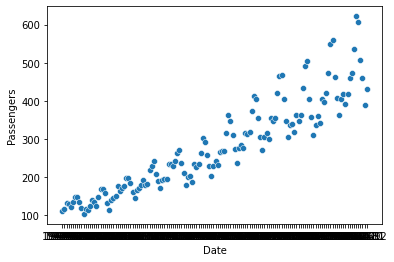

In [57]:
sns.scatterplot(data=air, x='Date', y='Passengers')


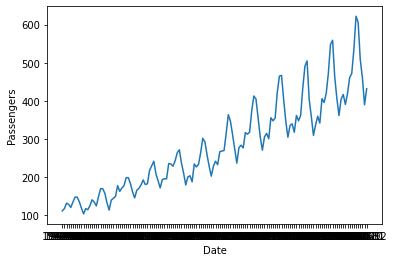

In [56]:
sns.lineplot(data=air, x='Date', y='Passengers')